In [1]:
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
import benchmark_utils as utils
import warnings
import seaborn as sns
from utils import *
from matplotlib.pyplot import *
from pathlib import Path, PurePath
from nilearn import image, plotting
from nilearn.input_data import NiftiMasker, NiftiLabelsMasker
from nilearn.glm.first_level import FirstLevelModel
from load_confounds import Params9
from sklearn.model_selection import KFold
from nilearn.decoding import Decoder
from IPython.display import Markdown, display

In [2]:
subject = 'sub-01'
path = '/home/SRastegarnia/hcptrt_decoding_Shima/DATA/cneuromod/hcptrt/fmriprep-20.2lts/{}/'.format(subject)
task_dir = '/home/SRastegarnia/hcptrt_decoding_Shima/hcptrt_decoding'

task_labels = [ 'motor', 'wm', 'language', 'gambling', 'social', 'relational', 'emotion']
warnings.filterwarnings('ignore')

### Generating beta maps:

**Task: motor**

response_left_foot 1.0
response_left_hand 1.0
response_right_foot 0.97
response_right_hand 0.97
response_tongue 0.96
mean value: 0.98 



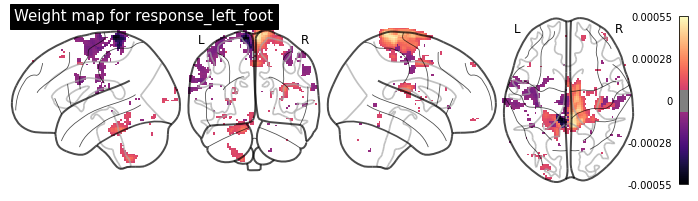

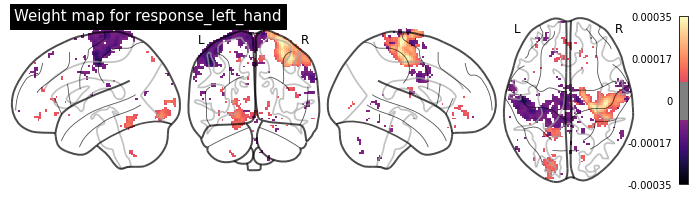

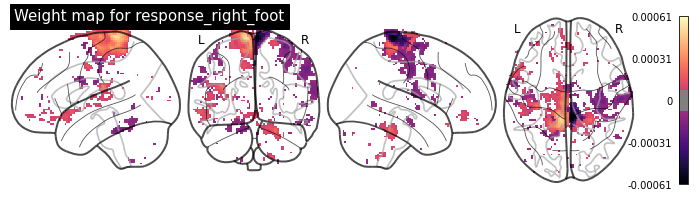

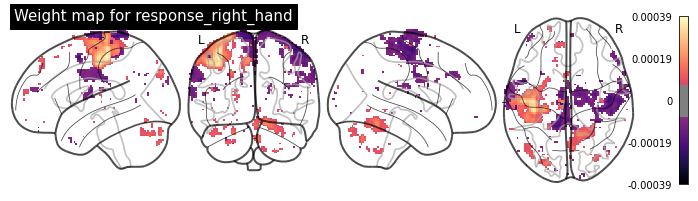

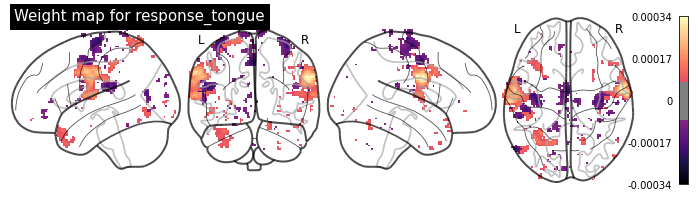

**Task: wm**

0-Back_Body 0.88
0-Back_Face 0.94
0-Back_Place 0.88
0-Back_Tools 0.86
2-Back_Body 0.9
2-Back_Face 0.93
2-Back_Place 0.88
2-Back_Tools 0.82
mean value: 0.89 



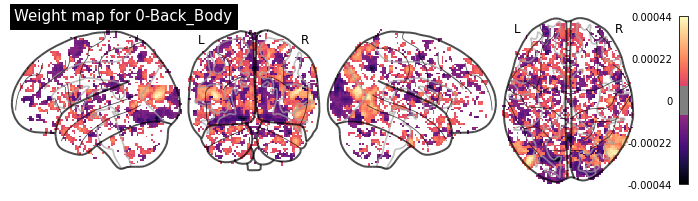

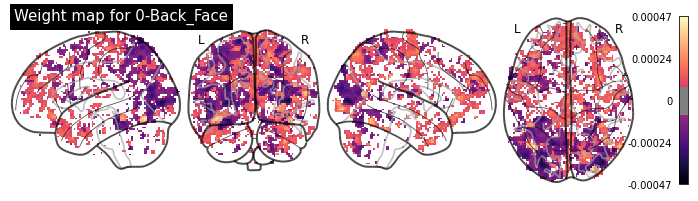

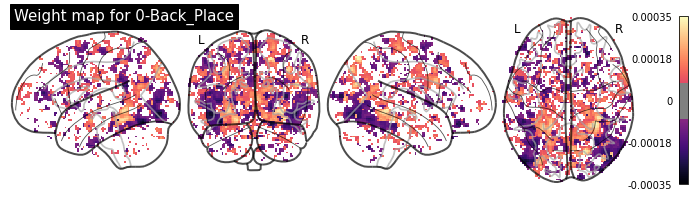

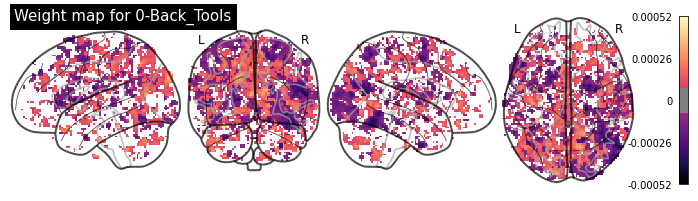

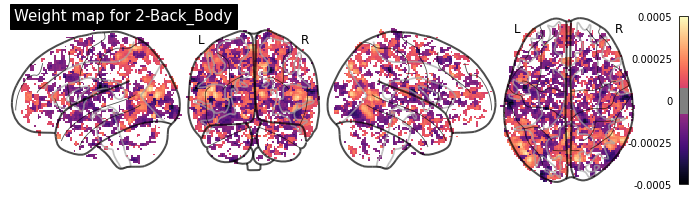

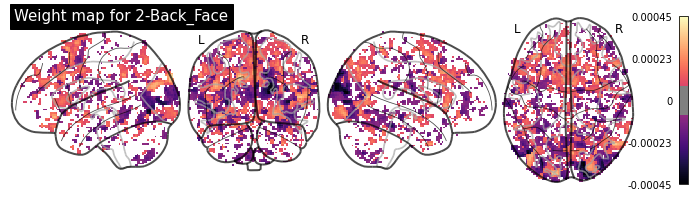

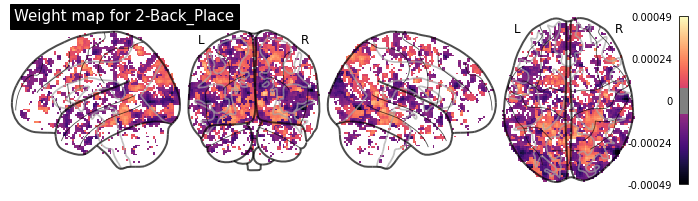

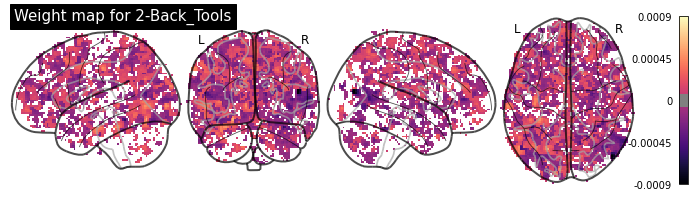

**Task: language**

presentation_math 0.98
presentation_story 0.98
question_math 0.94
question_story 0.96
response_math 0.95
response_story 0.87
mean value: 0.95 



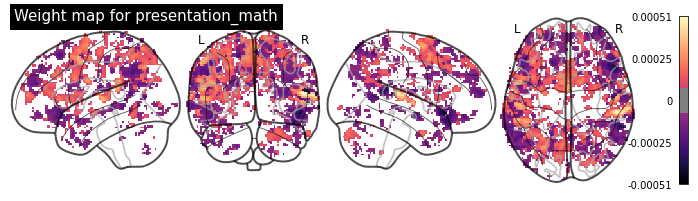

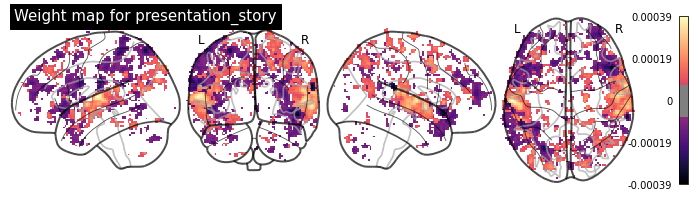

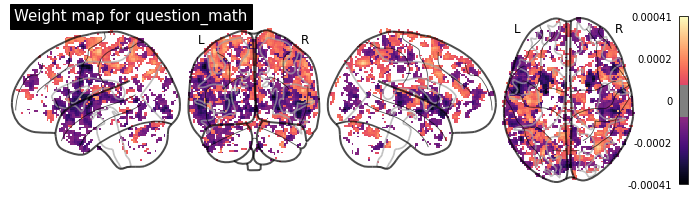

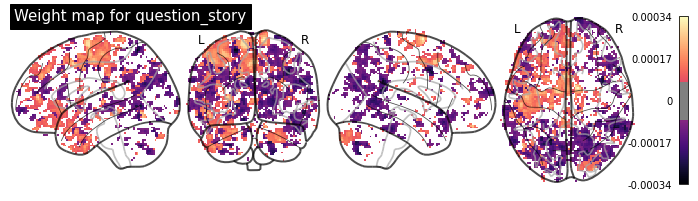

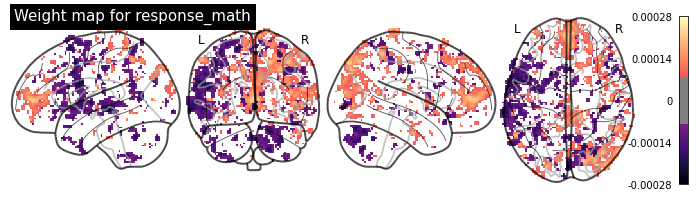

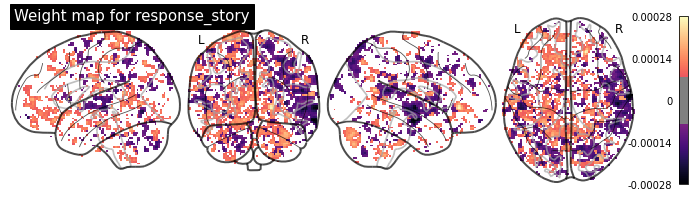

**Task: gambling**

Feedback 0.98
Neutral 0.73
Punishment 0.6
Reward 0.58
mean value: 0.73 



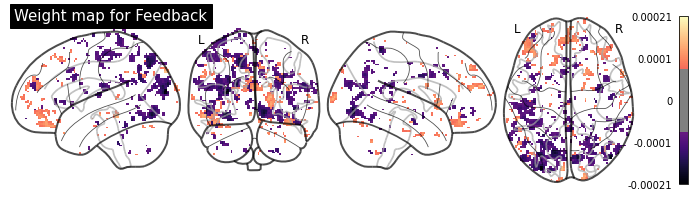

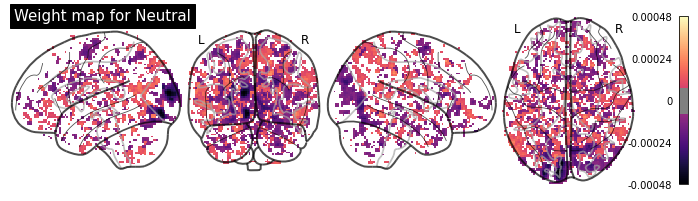

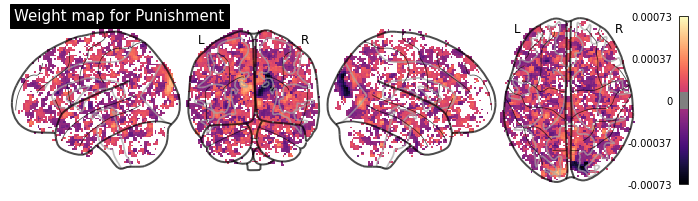

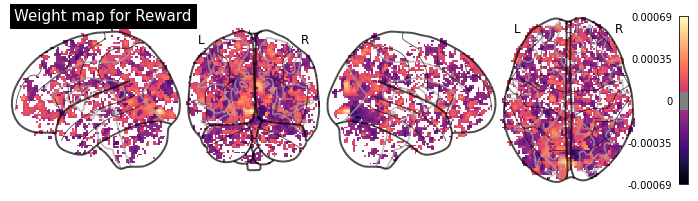

**Task: social**

mental 0.93
random 0.93
mean value: 0.93 



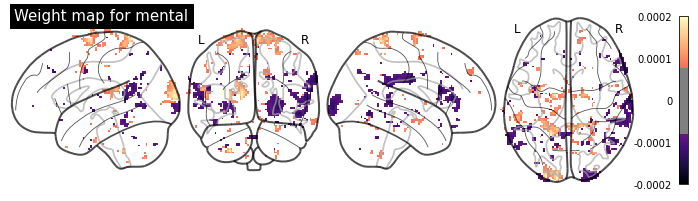

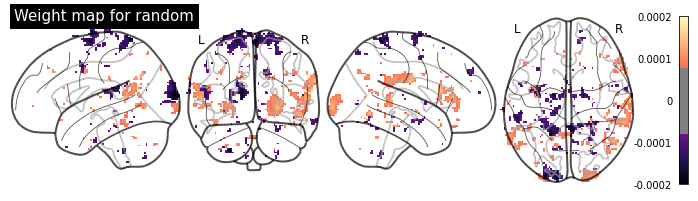

**Task: relational**

Control_Shape 0.77
Control_Texture 0.81
Relational_Shape 0.82
Relational_Texture 0.74
new_bloc_control_nan 0.86
new_bloc_relational_nan 0.89
mean value: 0.82 



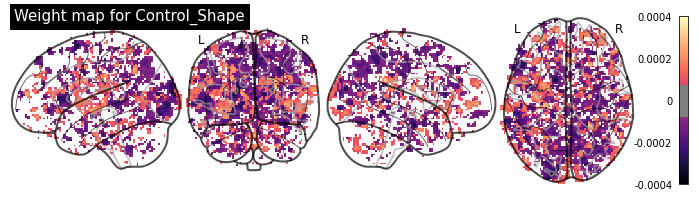

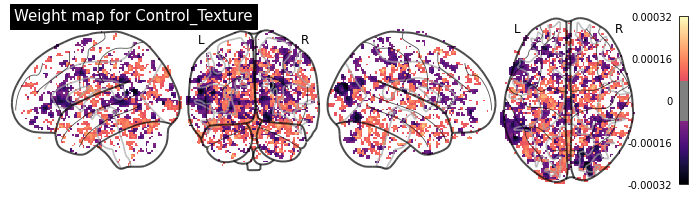

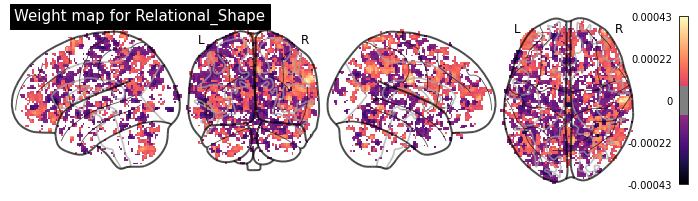

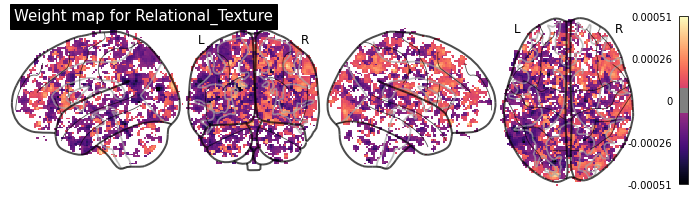

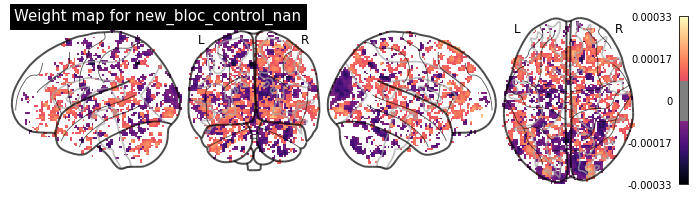

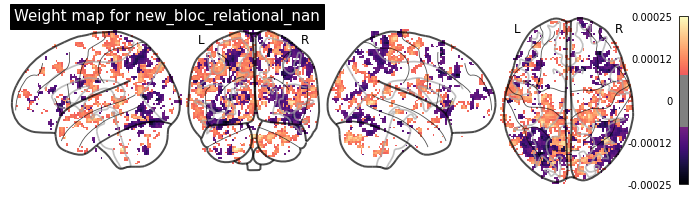

**Task: emotion**

response_face 0.96
response_shape 0.96
mean value: 0.96 



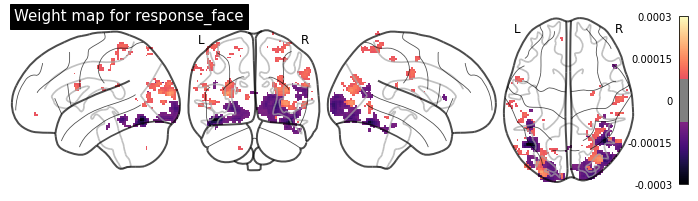

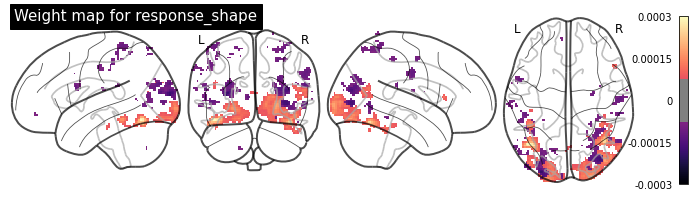

In [3]:
for task_label in task_labels:    
    
    tpl_mask = path + '{}_ses-002_task-{}_run-2_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'.format(
                subject, task_label)
    event_file = path + '{}_ses-002_task-{}_run-02_events.tsv'.format(
                subject, task_label)
    utils.printmd('**Task: {}**'.format(task_label))
    
    # Regress out the out of interest conditions
    df = utils.new_conditions(path, event_file, task_label)
    conditions = utils.conditions(event_file=df)

    # Generate beta maps
    utils.postproc_task(subject,task_label,conditions,tpl_mask)
    
    # Decoder
    utils.check_decoding(task_dir,task_label,tpl_mask)